In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import nibabel as nib
import scipy.io

In [40]:
! ls /workspace/walinet/PaulTrainData/3DMRSIMAP_Vol_06_A_1_2024-08-22_L2_0p0005

CombinedCSI.mat       Parameters_water.mat	   maps
LipidDecontamination  TESTING_beforeLipid.mat	   phamaps
LipidMaskNii	      UsedSourcecode_Part1.tar.gz  scalings
MeasurementInfos.txt  WaterReference.mat	   spectra
Parameters.mat	      logfile_part1.log		   water_spectra


In [10]:
p = '/workspace/walinet/PaulTrainData/3DMRSIMAP_Vol_06_A_1_2024-08-22_L2_0p0005/TESTING_beforeLipid.mat'
fh = h5py.File(p,'r')
print(fh.keys())

<KeysViewHDF5 ['#refs#', 'CoilCombtic', 'Concept_flag', 'CurAvg', 'FastPIReprocess_flag', 'NoOfPseudoReplicas', 'NoOfTempInterleaves', 'NoOfTempInterleaves_vec', 'NoiseCorrMat_post', 'Noise_CorrMat', 'Noise_mat', 'NumberOfLoopsPerSlice', 'Par', 'ReadInInfo', 'SettingsInfo', 'ans', 'conj_flag', 'csi', 'csi_k_backup', 'csi_k_p', 'dummyfilter', 'fid_mask', 'i', 'image', 'image_k_p', 'isStackofRings', 'kreiserl', 'mask', 'mask_BefInterpol', 'mask_flag_parfor', 'nSlices', 'nc', 'noise_sim', 'post_grd_dc_flag', 'size_csi', 'size_csi_ForNoise', 'slicenmb', 'tmp_dir', 'totCoili', 'totCoili_parfor', 'true_weights']>


<KeysViewHDF5 ['ONLINE', 'PATREFANDIMASCAN', 'PATREFSCAN']>
<KeysViewHDF5 ['Dwelltime', 'InPlaneRotation', 'LarmorFreq', 'PatientName', 'PhaseFoV', 'PhaseLines', 'PhaseVOI', 'ReadFOV', 'ReadLines', 'ReadVOI', 'SliceFOV', 'SliceLines', 'SliceNormalVector_x', 'SliceNormalVector_y', 'SliceNormalVector_z', 'SliceVOI', 'VoiPositionCor', 'VoiPositionSag', 'VoiPositionTra', 'nAve', 'nCha']>
180000.0
<KeysViewHDF5 ['FoV_Partition', 'FoV_Phase', 'FoV_Read', 'InPlaneRotation', 'InPlaneRotation_VOI', 'POS_X', 'POS_X_FirstVoxel', 'POS_Y', 'POS_Y_FirstVoxel', 'POS_Z', 'POS_Z_FirstVoxel', 'PatName', 'PhaseNormalVector', 'PosVOI_Cor', 'PosVOI_Sag', 'PosVOI_Tra', 'ReadNormalVector', 'SliceGap', 'SliceNormalVector', 'SliceNormalVector_x', 'SliceNormalVector_y', 'SliceNormalVector_z', 'SliceThickness', 'StepPhase', 'StepPhase_zf', 'StepRead', 'StepRead_zf', 'StepSlice', 'StepSlice_zf', 'TEs', 'ThreeD_flag', 'VoI_Partition', 'nFreqEnc', 'nFreqEnc_nonzf', 'nPartEnc', 'nPartEnc_nonzf', 'nPhasEnc', 'nPhasEn

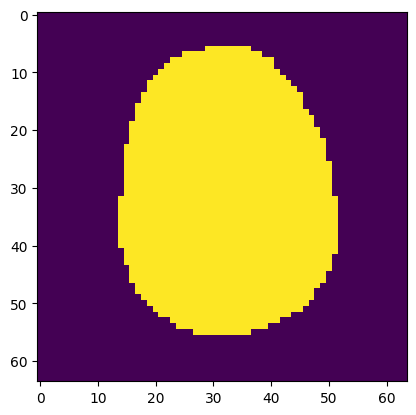

In [68]:
settings = fh['SettingsInfo']
print(settings.keys())

info = fh['ReadInInfo']
print(info['Par'].keys())
print(np.array(info['Par']['Dwelltime'])[0,0])

par = fh['Par']
print(par['CSI'].keys())

mask = np.array(fh['mask'])
print(mask.shape)
plt.imshow(mask[20,:,:])
plt.show()

In [42]:
p_wat = '/workspace/walinet/PaulTrainData/3DMRSIMAP_Vol_06_A_1_2024-08-22_L2_0p0005/WaterReference.mat'
#img = nib.load(p_wat)
fh_wat = h5py.File(p_wat,'r')
#print(fh_wat.keys())

OSError: Unable to synchronously open file (file signature not found)

In [12]:
csi = np.array(fh['csi'])
print(csi.shape)

(960, 39, 64, 64, 32)


In [14]:
csi = csi['real']+1j*csi['imag']

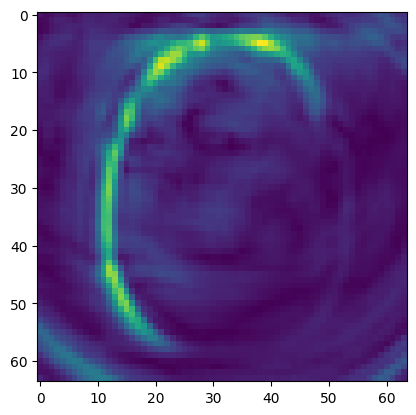

In [20]:
plt.imshow(np.abs(csi[0,20,:,:,2]))
plt.show()

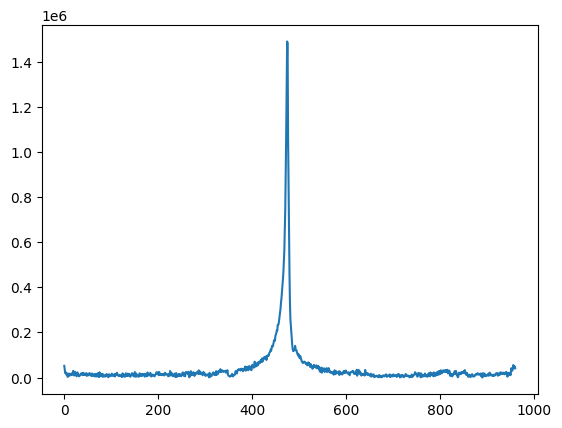

In [35]:
xdim=32
ydim=32
sl=20
coil=2

plt.plot(np.abs(np.fft.fftshift(np.fft.fft(csi[:,sl,xdim,ydim,coil]))))
plt.show()